# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | dindori
Processing Record 3 of Set 1 | tilichiki
Processing Record 4 of Set 1 | taonan
Processing Record 5 of Set 1 | hofn
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | teguldet
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | alexandria
Processing Record 17 of Set 1 | ketchikan
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | namie
Processing Record 22 of Set 1 | ribeira grande
Processing Record

Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | tanga
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 4 | evensk
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | bolshiye uki
City not found. Skipping...
Processing Record 49 of Set 4 | bonavista
Processing Record 0 of Set 5 | talnakh
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | chumikan
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | dubai
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | ust-kulom
Processing Record 9 of Set 5 | saint-georges
Processing Record 10 of Set 5 | vanimo
Processing Record 11 of Set 5 | manono
Process

Processing Record 30 of Set 8 | sistranda
Processing Record 31 of Set 8 | caravelas
Processing Record 32 of Set 8 | palmeiras de goias
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | olafsvik
Processing Record 35 of Set 8 | cordele
Processing Record 36 of Set 8 | coahuayana
Processing Record 37 of Set 8 | pangai
Processing Record 38 of Set 8 | ternate
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | gravelbourg
Processing Record 41 of Set 8 | haifa
Processing Record 42 of Set 8 | catabola
Processing Record 43 of Set 8 | basco
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | eureka
Processing Record 46 of Set 8 | pangoa
Processing Record 47 of Set 8 | sao joao da barra
Processing Record 48 of Set 8 | caconda
Processing Record 49 of Set 8 | opuwo
Processing Record 0 of Set 9 | neiafu
Processing Record 1 of Set 9 | pinega
Processing Record 2 of Set 9 | terrasini
Processing Record

Processing Record 21 of Set 12 | quatre cocos
Processing Record 22 of Set 12 | ullapool
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | ilhabela
Processing Record 25 of Set 12 | cairns
Processing Record 26 of Set 12 | urambo
Processing Record 27 of Set 12 | jamame
Processing Record 28 of Set 12 | nelson bay
Processing Record 29 of Set 12 | melfi
Processing Record 30 of Set 12 | kuusamo
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Record 32 of Set 12 | amapa
Processing Record 33 of Set 12 | ixtapa
Processing Record 34 of Set 12 | kieta
Processing Record 35 of Set 12 | dangriga
Processing Record 36 of Set 12 | furmanov
Processing Record 37 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 12 | kerema
Processing Record 39 of Set 12 | samusu
City not found. Skipping...
Processing Record 40 of Set 12 | noumea
Processing Record 41 of Set 12 | elko
Processing Record 42 of Set 12 | solano
Processing Record 43 of Set 12 | gzhatsk

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,23.36,75,57,4.75,BR,1675551269
1,dindori,22.9500,81.0833,12.59,26,6,0.58,IN,1675551270
2,tilichiki,60.4667,166.1000,-26.38,96,40,3.71,RU,1675551272
3,taonan,45.3333,122.7833,-17.18,92,31,1.87,CN,1675551272
4,hofn,64.2539,-15.2082,0.39,63,62,3.42,IS,1675551273


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,23.36,75,57,4.75,BR,1675551269
1,dindori,22.9500,81.0833,12.59,26,6,0.58,IN,1675551270
2,tilichiki,60.4667,166.1000,-26.38,96,40,3.71,RU,1675551272
3,taonan,45.3333,122.7833,-17.18,92,31,1.87,CN,1675551272
4,hofn,64.2539,-15.2082,0.39,63,62,3.42,IS,1675551273


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

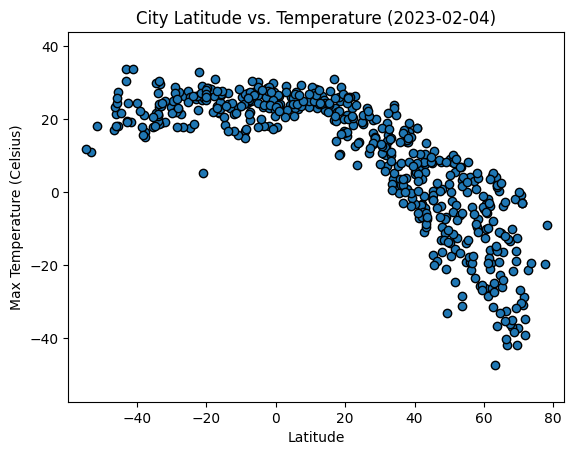

In [10]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Temperature ({str(datetime.date.today())})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.ylim(city_data_df['Max Temp'].min()-10, city_data_df['Max Temp'].max()+10)
plt.xlim(city_data_df['Lat'].min()-5, city_data_df['Lat'].max()+5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

This plot demonstrates a relationship between the max. temperature in the countries and the Latitude where they are located. When approaching the Ecuador the max temperatures are higher.

#### Latitude Vs. Humidity

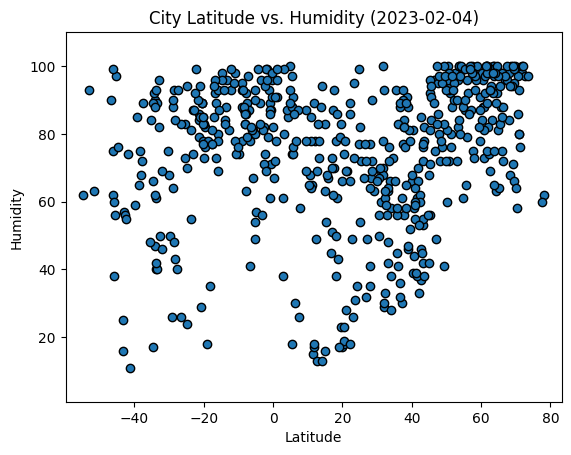

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df['Lat']
y_values=city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({str(datetime.date.today())})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(city_data_df['Humidity'].min()-10, city_data_df['Humidity'].max()+10)
plt.xlim(city_data_df['Lat'].min()-5, city_data_df['Lat'].max()+5)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

This plot demonstrates that there is no clear relationship between the humidity in the countries and the Latitude where they are located.

#### Latitude Vs. Cloudiness

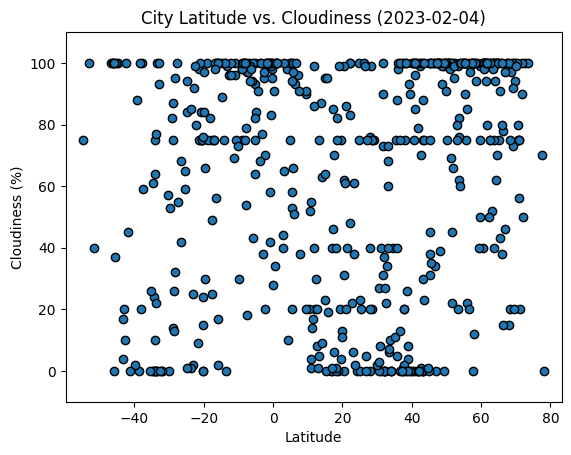

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Lat']
y_values=city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({str(datetime.date.today())})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(city_data_df['Cloudiness'].min()-10, city_data_df['Cloudiness'].max()+10)
plt.xlim(city_data_df['Lat'].min()-5, city_data_df['Lat'].max()+5)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

This plot demonstrates that there is no clear relationship between the cloudiness in the countries and the Latitude where they are located. 

#### Latitude vs. Wind Speed Plot

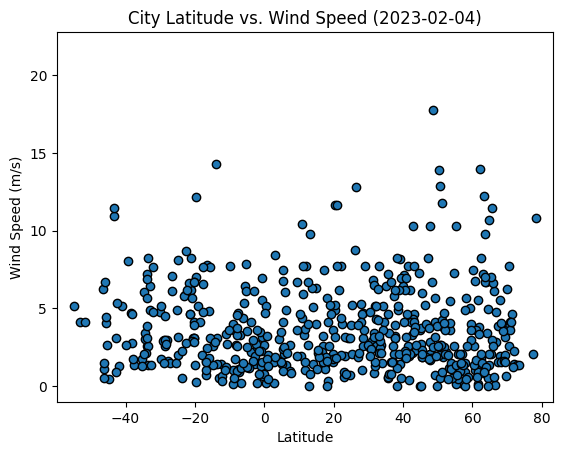

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Lat']
y_values=city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({str(datetime.date.today())})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim(city_data_df['Wind Speed'].min()-1, city_data_df['Wind Speed'].max()+5)
plt.xlim(city_data_df['Lat'].min()-5, city_data_df['Lat'].max()+5)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

This plot demonstrates that there is no clear relationship between the wind speed in the countries and the Latitude where they are located.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dindori,22.9500,81.0833,12.59,26,6,0.58,IN,1675551270
2,tilichiki,60.4667,166.1000,-26.38,96,40,3.71,RU,1675551272
3,taonan,45.3333,122.7833,-17.18,92,31,1.87,CN,1675551272
4,hofn,64.2539,-15.2082,0.39,63,62,3.42,IS,1675551273
5,longyearbyen,78.2186,15.6401,-9.09,62,0,10.80,SJ,1675551273


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,23.36,75,57,4.75,BR,1675551269
8,saint-philippe,-21.3585,55.7679,25.77,86,99,4.62,RE,1675551234
9,rawson,-43.3002,-65.1023,30.55,25,17,10.97,AR,1675550989
11,vaini,-21.2000,-175.2000,27.09,94,75,8.23,TO,1675551275
13,punta arenas,-53.1500,-70.9167,11.06,93,100,4.12,CL,1675550979


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.72


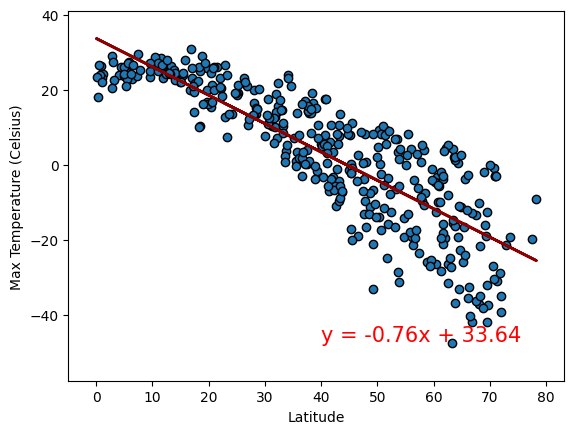

In [53]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.ylim(northern_hemi_df['Max Temp'].min()-10, northern_hemi_df['Max Temp'].max()+10)
plt.xlim(northern_hemi_df['Lat'].min()-5, northern_hemi_df['Lat'].max()+5)
# Save the figure
plt.savefig("output_data/Fig5.png")
plt.annotate(line_eq,(40, -47), fontsize=15, color='red')

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between max. temperature and latitude.

The r-squared is: 0.06


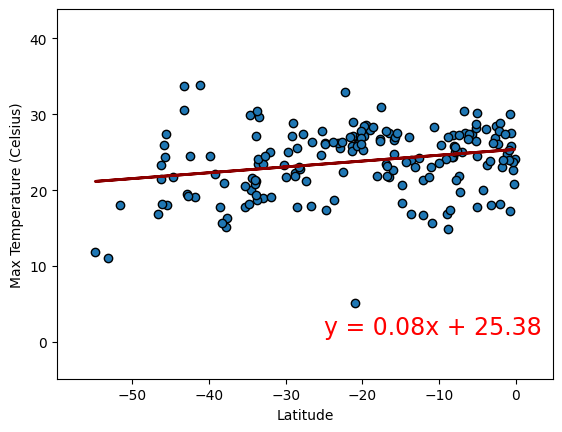

In [47]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.ylim(southern_hemi_df['Max Temp'].min()-10, southern_hemi_df['Max Temp'].max()+10)
plt.xlim(southern_hemi_df['Lat'].min()-5, southern_hemi_df['Lat'].max()+5)
plt.annotate(line_eq,(-25, 1), fontsize=17, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

Discussion about the linear relationship: For the Northern Hemisphere there is a strong negative relation between max temperature and latitude. For the Southern Hemisphere there is a weak positive relation between max temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16


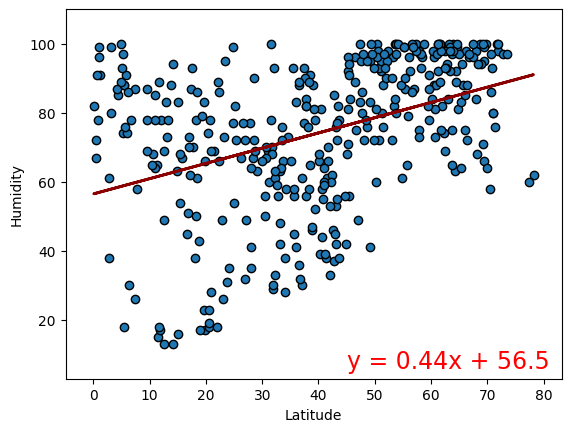

In [44]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Humidity']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(northern_hemi_df['Humidity'].min()-10, northern_hemi_df['Humidity'].max()+10)
plt.xlim(northern_hemi_df['Lat'].min()-5, northern_hemi_df['Lat'].max()+5)
plt.annotate(line_eq,(45, 6), fontsize=17, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

The r-squared is: 0.14


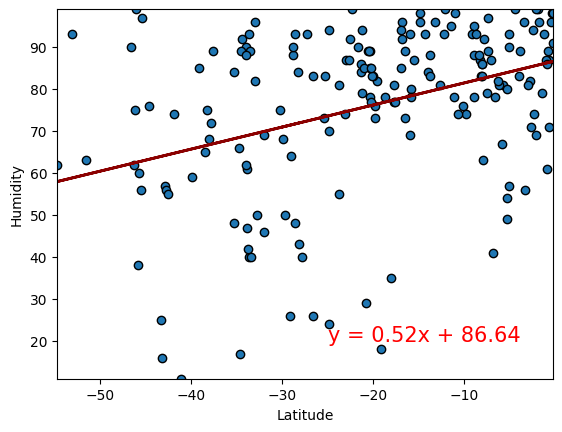

In [56]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(southern_hemi_df['Humidity'].min(), southern_hemi_df['Humidity'].max())
plt.xlim(southern_hemi_df['Lat'].min(), southern_hemi_df['Lat'].max())
plt.annotate(line_eq,(-25,20), fontsize=15, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

Discussion about the linear relationship: For the Northern Hemisphere there is a positive relation between the humidity and latitude. For the Southern Hemisphere there is a positive relation between the humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.15


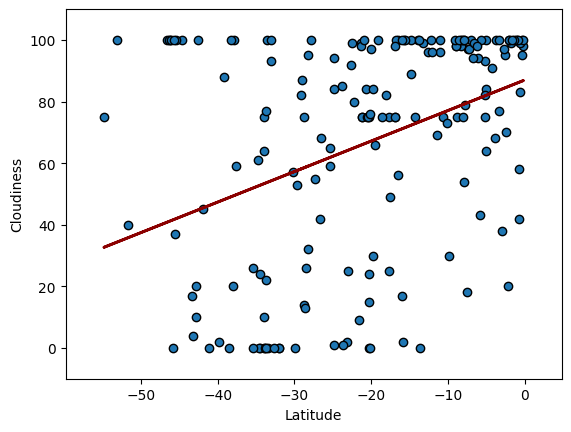

In [58]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(southern_hemi_df['Cloudiness'].min()-10, southern_hemi_df['Cloudiness'].max()+10)
plt.xlim(southern_hemi_df['Lat'].min()-5, southern_hemi_df['Lat'].max()+5)
plt.annotate(line_eq,(45, 6), fontsize=17, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

The r-value is: 0.02056735429994368


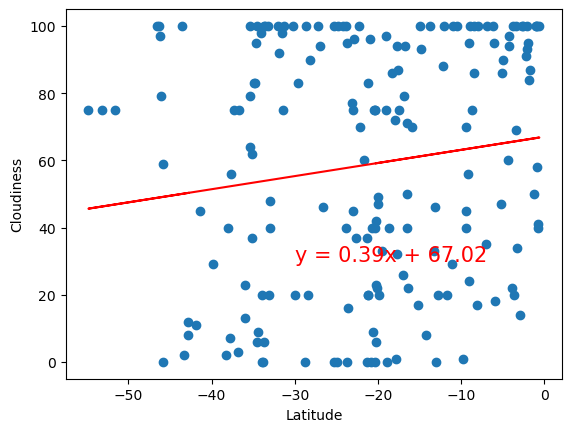

In [20]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values =northern_hemi_df['Cloudiness']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(northern_hemi_df['Cloudiness'].min()-10, northern_hemi_df['Cloudiness'].max()+10)
plt.xlim(northern_hemi_df['Lat'].min()-5, northern_hemi_df['Lat'].max()+5)
plt.annotate(line_eq,(45, 6), fontsize=17, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

Discussion about the linear relationship: For the Northern Hemisphere there is a positive relation between the cloudiness and latitude. For the Southern Hemisphere there is a weak positive correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


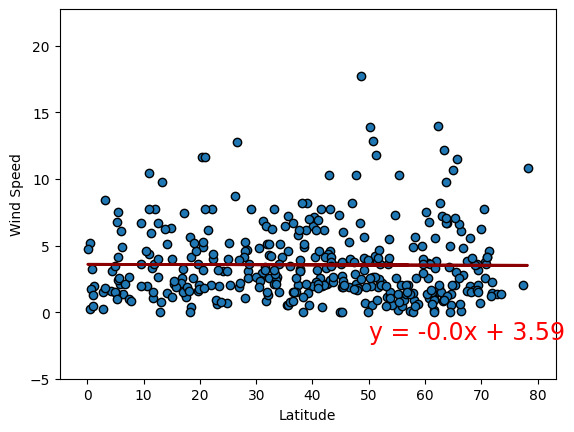

In [69]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(northern_hemi_df['Wind Speed'].min()-5, northern_hemi_df['Wind Speed'].max()+5)
plt.xlim(northern_hemi_df['Lat'].min()-5, northern_hemi_df['Lat'].max()+5)
plt.annotate(line_eq,(50, -2), fontsize=17, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

The r-squared is: 0.04


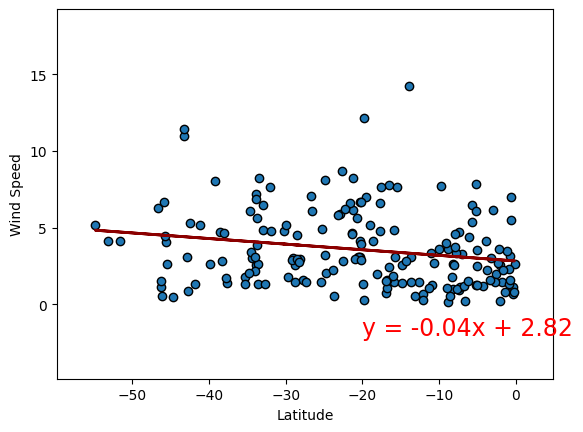

In [67]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(southern_hemi_df['Wind Speed'].min()-5, southern_hemi_df['Wind Speed'].max()+5)
plt.xlim(southern_hemi_df['Lat'].min()-5, southern_hemi_df['Lat'].max()+5)
plt.annotate(line_eq,(-20, -2), fontsize=17, color='red')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Print r value
print(f'The r-squared is: {round(rvalue**2,2)}')
# Show plot
plt.show()

Discussion about the linear relationship: For the Northern Hemisphere there is no relation between the wind speed and latitude. For the Southern Hemisphere there is a weak negative correlation between wind speed and latitude.